In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import explore

from wrangle import wrangle_zillow
from wrangle import scale_zillow
from splitter import splitter

import warnings
warnings.filterwarnings("ignore")

## Wrangling, splitting, and visualizations of all variable combinations (see explore.py for graphing functions used)

In [10]:
df = wrangle_zillow()

In [11]:
train, test, validate = splitter(df)

Train = 56.0% | Validate = 24.0% | Test = 20.0%
You did not stratify.  If looking to stratify, ensure to add argument: "target = variable to stratify on".


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192291 entries, 1774040 to 42058
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   bedroomcnt   1192291 non-null  int64  
 1   bathroomcnt  1192291 non-null  float64
 2   sqft         1192291 non-null  int64  
 3   value        1192291 non-null  int64  
 4   yearbuilt    1192291 non-null  int64  
 5   taxamount    1192291 non-null  float64
 6   fips_name    1192291 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 72.8+ MB


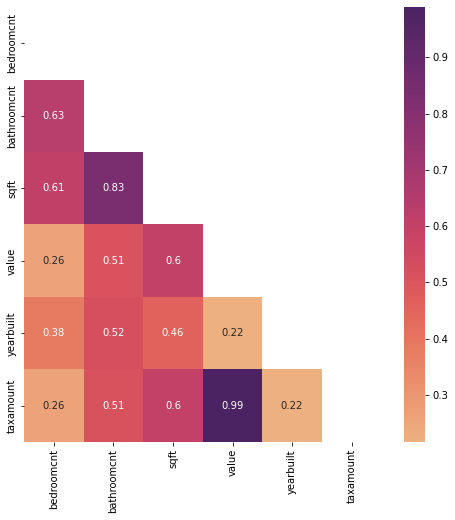

Sample size used = 100000; or, 8.39% of the dataset.


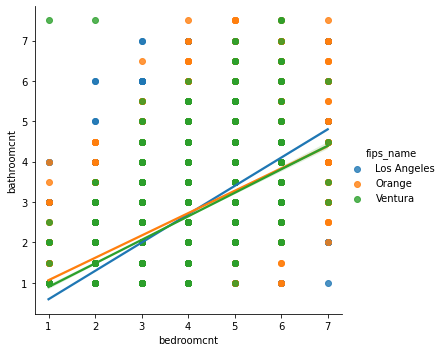

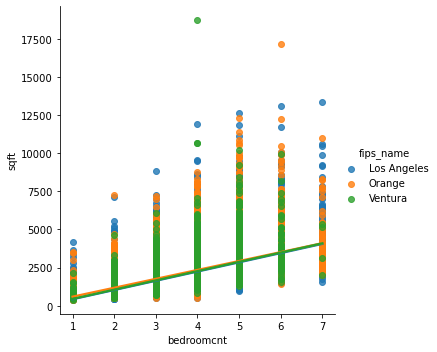

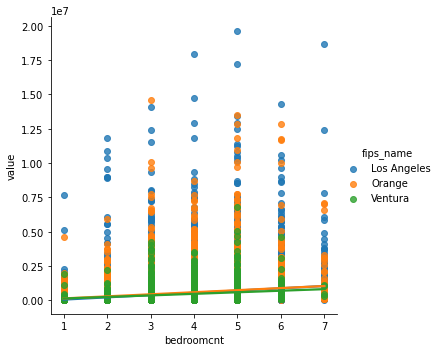

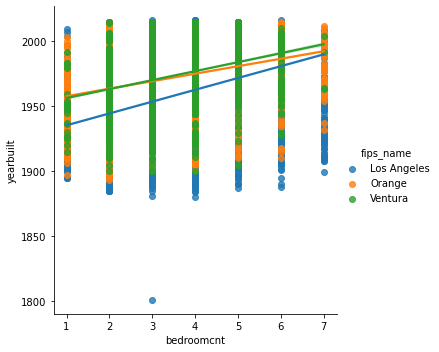

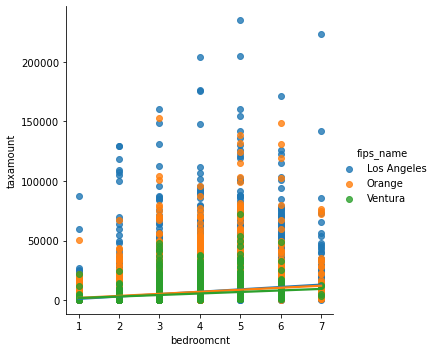

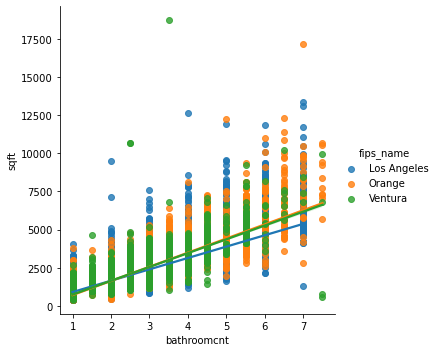

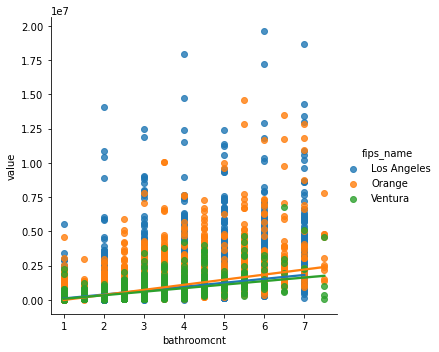

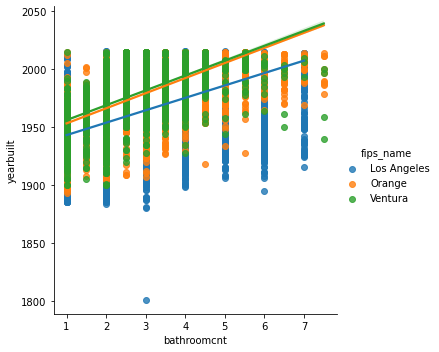

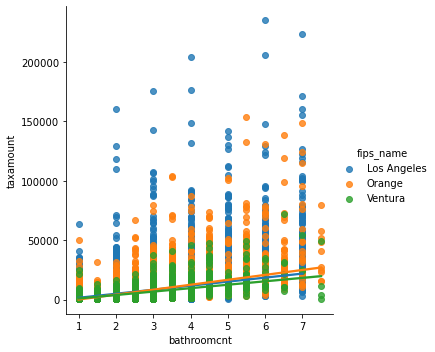

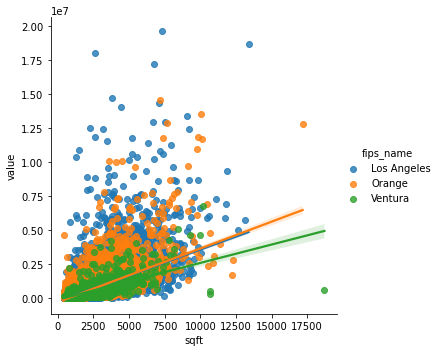

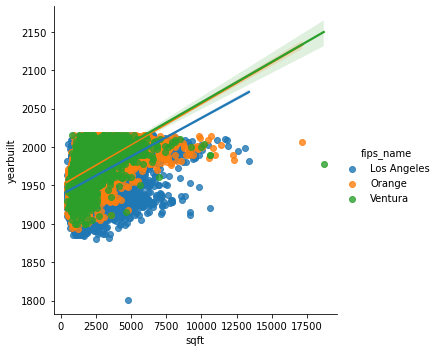

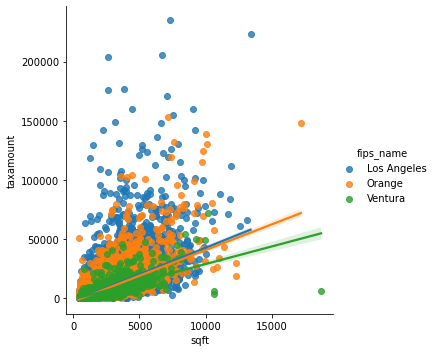

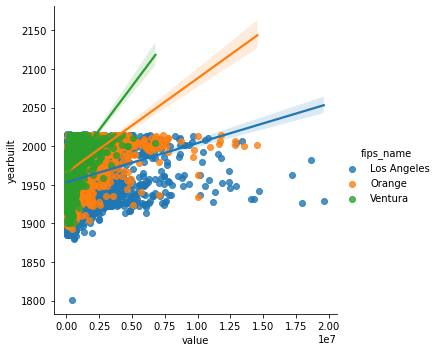

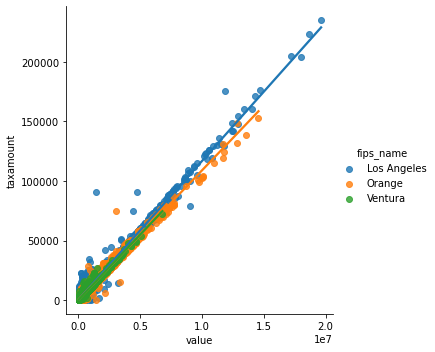

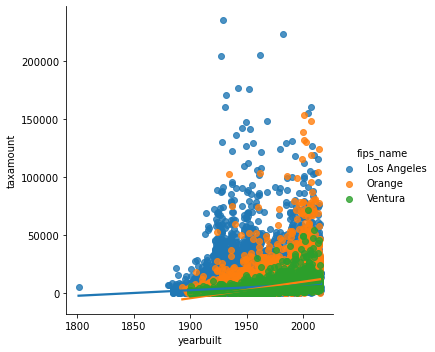

In [5]:
explore.plot_variable_pairs(train, sample_size=100000)

Sample size used = 100000; or, 8.39% of the dataset.


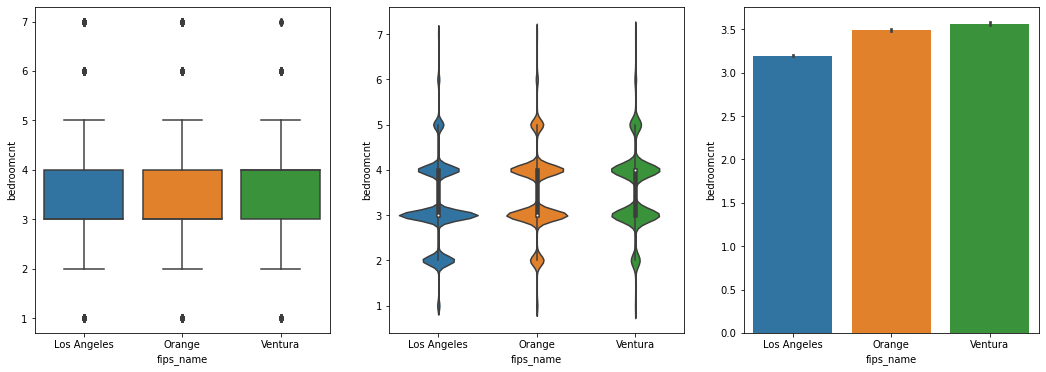

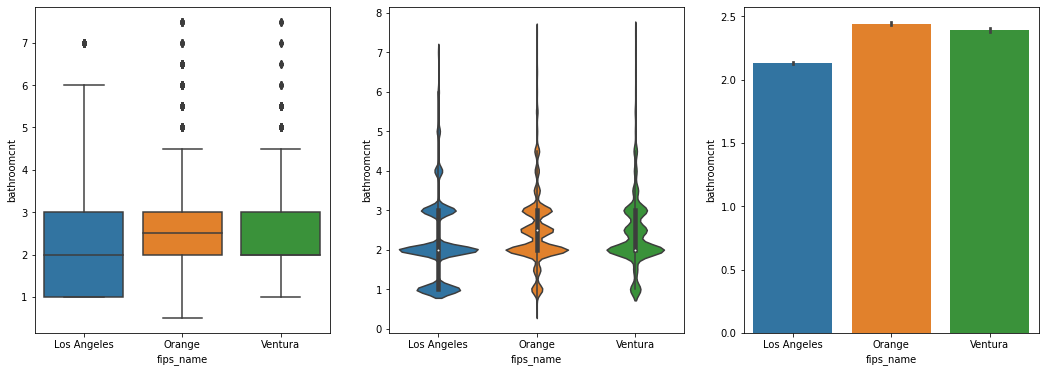

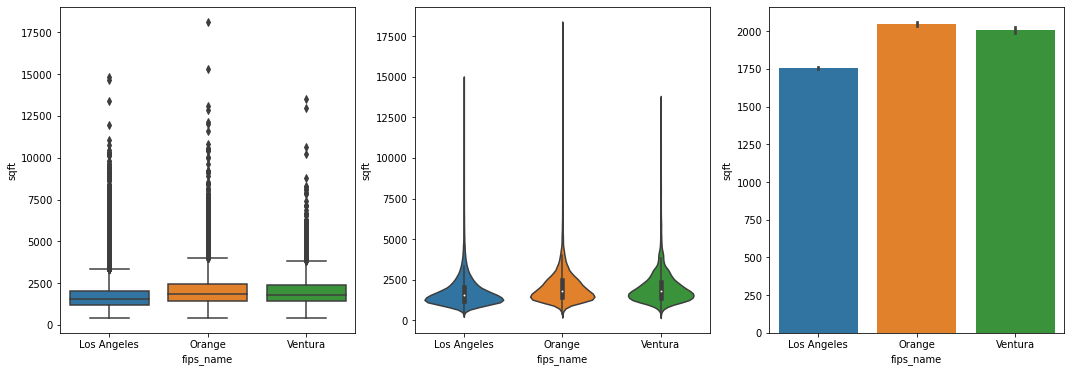

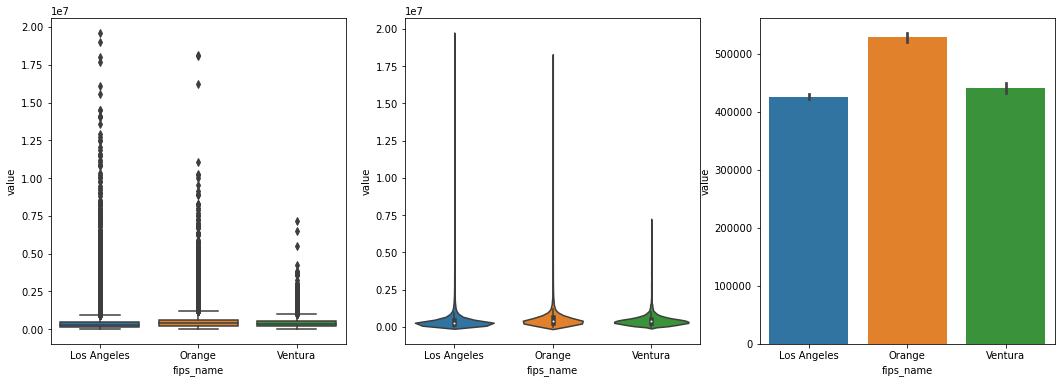

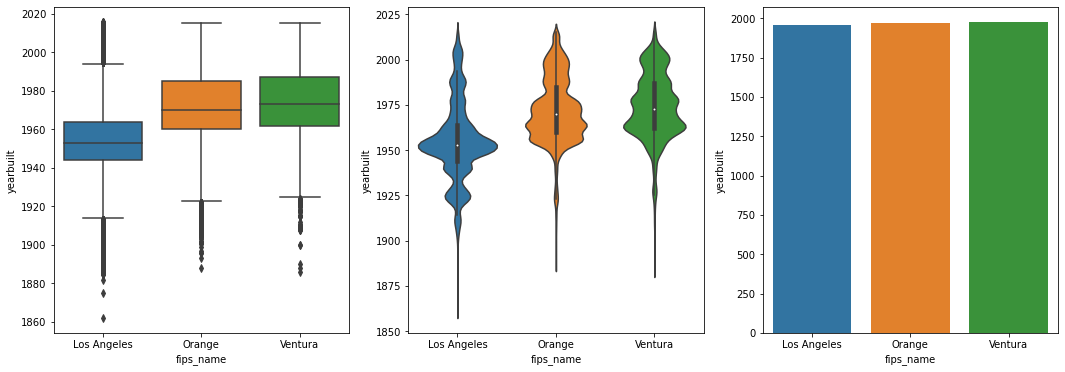

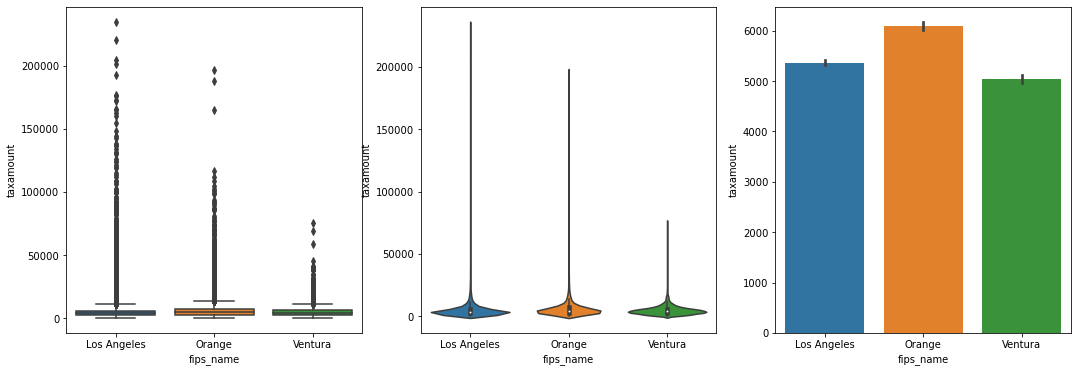

In [6]:
explore.plot_categorical_and_continuous_vars(train,sample_size=100000)

## Hypotheses
1. Tax amount (an independant value) and home value (dependent variable) are highy correlated, so tax amount can be excluded from analysis.
2. Greater square footage is correlated with higher home value.
3. Bathrooms are correlated with home square footage (more than anything else surprisingly).
4. Orange County has the highest average home value, followed by Ventura then LA
5. Bedroom count is correlated with a higher home value.
6. Newer homes are correlated with a higher home value.

## Statistical Testing

In [44]:
import scipy.stats as stats

### Location (fips) vs Home Value [ANOVA]

-Null Hypothesis, H0:  There is no difference in the means of home values between Orange, Ventura and LA counties.

-Alternative Hypothesis, Ha: There is a statistically signifigant difference in the means home values between each of the counties.

In [7]:
alpha = .05

In [38]:
oc_value = train[train.fips_name == 'Orange'].value
ventura_value = train[train.fips_name == 'Ventura'].value
la_value = train[train.fips_name == 'Los Angeles'].value

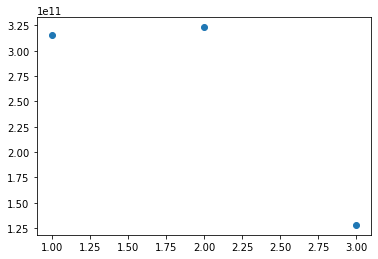

In [70]:
y = [la_value.var(),oc_value.var(),ventura_value.var()]
plt.scatter(x=[1,2,3],y=y)
plt.show()

Assumptions: Independant (yes), Normal (enough samples), Equal Variances (relatively...)

In [72]:
h,p = stats.kruskal(oc_value, ventura_value, la_value)
h,p

(30961.730677641663, 0.0)

##### p~0: We reject the null hypothesis that the home value means are equal.

Run stats tests to include
-bathrooms vs square footage (any way to combine?)
-bedrooms vs bathrooms (any correlation enough to eliminate, or combine)
-value vs tax amount (correlation? yes - use this to eliminate)
-square footage vs home value (null = no correlation)
-location vs home value (ANOVA?)

Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Explore your dataset with any other visualizations you think will be helpful.